# Part 3: NLP

In [90]:
import numpy as np
import pandas as pd
import re
import calendar

import seaborn as sns
import matplotlib.style as style

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

style.use('fivethirtyeight')

In [91]:
us_cost_living_df = pd.read_csv('./data/us_cost_living.csv')
df = pd.read_csv('./data/combined_data.csv')

In [92]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'job_title', 'salary', 'company',
       'location', 'is_remote', 'job_rating', 'job_summary', 'post_date',
       'extract_date', 'job_url', 'rate_by', 'min', 'max', 'adjusted_salary',
       'yearly_adjusted_salary', 'salary_bins', 'City', 'Cost of Living Index',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [93]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','City'], inplace=True)

In [99]:
df['Cost of Living Index'].quantile(list(np.linspace(0,1,4)))

0.000000     57.94
0.333333     71.81
0.666667     79.82
1.000000    100.00
Name: Cost of Living Index, dtype: float64

In [102]:
cut_bins = [57, 71.81, 79.82, 100]
cut_labels = ['low',  'medium', 'high']

df['city_bins'] = pd.cut(df['Cost of Living Index'], 
                        bins = cut_bins,
                        labels= cut_labels)
df['city_bins'].value_counts().sort_index(ascending = False)

high      300
medium    299
low       307
Name: city_bins, dtype: int64

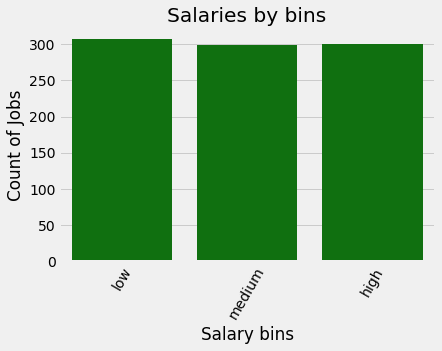

In [104]:
binies = df['city_bins'].value_counts()

sns.barplot(x = binies.index, y = binies.values, color='green')
 
plt.xticks(rotation=60)
plt.xlabel('Salary bins')
plt.ylabel('Count of Jobs')
plt.title('Salaries by bins');

In [105]:
# sal_bins = [0,50000,100000,150000,200000,250000,300000,350000,70000,90000,120000,150000,400000]
# df['Salary_Bins'] = pd.cut(x=df['adjusted_yearly_salary'], bins=sal_bins, labels=False)
df['adjusted_salary'].value_counts().sort_index(ascending = False)

500000.00    1
312500.00    2
270000.00    1
260000.00    1
240682.00    1
            ..
12.50        1
12.00        1
10.81        1
10.00        2
7.25         2
Name: adjusted_salary, Length: 697, dtype: int64

In [106]:
# sal_bins = [0, 125000, 250000, 375000, 500000]
# df['salary_bins'] = pd.cut(x=df['yearly_adjusted_salary'], bins=sal_bins, labels=False)

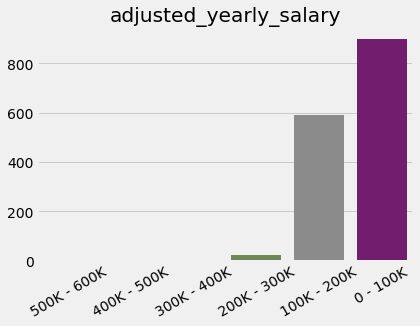

In [107]:
g = df['salary_bins'].value_counts().sort_index(ascending = False)
sns.barplot(x = g.index, y=g.values)
plt.title("adjusted_yearly_salary")
plt.xticks(rotation=30);

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
y = df['salary_bins'].astype('category')


In [110]:
X_train, X_test, y_train, y_test = train_test_split(df['job_title'], y, test_size=0.2)

In [111]:
#use count vectorizer to examine title

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)

In [112]:
cv

CountVectorizer(min_df=0.03, ngram_range=(1, 3), stop_words='english')

In [113]:
#fitting count vectorizer to job title

cv.fit(X_train)

title_words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

In [114]:
title_words.head()

,analyst,business,business analyst,data,data analyst,data scientist,engineer,intelligence,learning,machine,...,management,program,program analyst,scientist,senior,senior data,software,software engineer,sr,statistician
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
word_observe = pd.concat([title_words, y_train], axis=1)

word_observe.head()

,analyst,business,business analyst,data,data analyst,data scientist,engineer,intelligence,learning,machine,...,program,program analyst,scientist,senior,senior data,software,software engineer,sr,statistician,salary_bins
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 100K
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100K - 200K
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100K - 200K
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 100K


In [116]:
for i in range(0,7):
    word_count = word_observe[word_observe['salary_bins']==i].sum(axis=0)
    print(i, "Bin most common words:")
    cw = word_count.sort_values(ascending=False).head(30)
    print(cw)

0 Bin most common words:
salary_bins          0.0
statistician         0.0
business             0.0
business analyst     0.0
data                 0.0
data analyst         0.0
data scientist       0.0
engineer             0.0
intelligence         0.0
learning             0.0
machine              0.0
machine learning     0.0
management           0.0
program              0.0
program analyst      0.0
scientist            0.0
senior               0.0
senior data          0.0
software             0.0
software engineer    0.0
sr                   0.0
analyst              0.0
dtype: float64
1 Bin most common words:
salary_bins          0.0
statistician         0.0
business             0.0
business analyst     0.0
data                 0.0
data analyst         0.0
data scientist       0.0
engineer             0.0
intelligence         0.0
learning             0.0
machine              0.0
machine learning     0.0
management           0.0
program              0.0
program analyst      0.0
scientist 

In [118]:
#Combine Title with the Description
df['combined_text'] = df['job_title'].str.cat(df['job_summary'], sep = ' ')

In [119]:
df['combined_text'][3]

'Data Scientist We need a data expert with experience in software to manage these data challenges, as well as a strong foundation in statistical analysis.'

In [120]:
df.head()

,job_title,salary,company,location,is_remote,job_rating,job_summary,post_date,extract_date,job_url,...,yearly_adjusted_salary,salary_bins,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city_bins,combined_text
0,Data Scientist Intern,$18 an hour,Hach,New York NY,NaN,3.2,"Parameters like pH, alkalinity, disinfectant c...",2 days ago,2021-01-15,https://www.indeed.com/rc/clk?jk=6a1c9dc5d54ca...,...,43992.0,0 - 100K,100.0,100.0,100.0,100.0,100.0,100.0,high,"Data Scientist Intern Parameters like pH, alka..."
1,Data Scientist,"$88,656 - $222,212 a year",PebblePost,New York NY,Temporarily remote,NaN,Expertise in machine learning techniques.\nArc...,7 days ago,2021-01-15,https://www.indeed.com/company/PebblePost/jobs...,...,155434.0,100K - 200K,100.0,100.0,100.0,100.0,100.0,100.0,high,Data Scientist Expertise in machine learning t...
2,Search Engine Marketing Data Scientist (Specia...,"$80,000 - $135,000 a year",Think Green Supplies LLC,New York NY,NaN,NaN,Experience in data science with a focus on mar...,30+ days ago,2021-01-15,https://www.indeed.com/company/Think-Green-Sup...,...,107500.0,100K - 200K,100.0,100.0,100.0,100.0,100.0,100.0,high,Search Engine Marketing Data Scientist (Specia...
3,Data Scientist,"$130,000 - $160,000 a year",Universal Yums LLC,Roseland NJ,Temporarily remote,NaN,We need a data expert with experience in softw...,23 days ago,2021-01-15,https://www.indeed.com/company/Universal-Yums-...,...,145000.0,100K - 200K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Scientist We need a data expert with expe...
4,Data Science Resident,$35 an hour,Galvanize,New York NY,NaN,3.8,"As part of the Residency program, you will rec...",30+ days ago,2021-01-15,https://www.indeed.com/rc/clk?jk=ef6e356eb6fe8...,...,85540.0,0 - 100K,100.0,100.0,100.0,100.0,100.0,100.0,high,Data Science Resident As part of the Residency...


In [121]:
df.to_csv("./data/final_only_salary_us_data_jobs.csv")

## Freqs

In [122]:
import time
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re

from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [123]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data)

In [124]:
job_tokens = clean_word(df['combined_text'])

In [125]:
all_tokens = [word for job in job_tokens for word in job]

In [126]:
#Most common 50 words
job_tokens_freq = FreqDist(all_tokens)
job_tokens_freq.most_common(100)

[('data', 2375),
 ('analyst', 1113),
 ('business', 698),
 ('experience', 584),
 ('learning', 417),
 ('years', 399),
 ('machine', 376),
 ('engineer', 306),
 ('analysis', 271),
 ('software', 216),
 ('senior', 200),
 ('scientist', 195),
 ('management', 161),
 ('systems', 151),
 ('analyze', 139),
 ('science', 136),
 ('research', 131),
 ('work', 131),
 ('support', 130),
 ('analytics', 126),
 ('program', 116),
 ('required', 114),
 ('time', 110),
 ('development', 102),
 ('ability', 101),
 ('technical', 101),
 ('design', 98),
 ('preferred', 95),
 ('reporting', 91),
 ('knowledge', 90),
 ('team', 89),
 ('working', 89),
 ('full', 84),
 ('intelligence', 83),
 ('using', 80),
 ('requirements', 79),
 ('sr', 78),
 ('tools', 78),
 ('quality', 77),
 ('project', 77),
 ('position', 77),
 ('develop', 75),
 ('models', 75),
 ('lead', 74),
 ('strong', 73),
 ('system', 73),
 ('solutions', 72),
 ('reports', 72),
 ('skills', 72),
 ('computer', 70),
 ('level', 67),
 ('deep', 65),
 ('degree', 65),
 ('related', 65)

In [127]:
len(job_tokens_freq)

3970

In [128]:
total_word_count = sum(job_tokens_freq.values())
job_top_100 = job_tokens_freq.most_common(100)
print('Word\t\t\tNormalized Frequency')
for word in job_top_100:
    normalized_frequency = word[1]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
data 			 0.08312
analyst 			 0.03895
business 			 0.02443
experience 			 0.02044
learning 			 0.01459
years 			 0.01396
machine 			 0.01316
engineer 			 0.01071
analysis 			 0.009485
software 			 0.00756
senior 			 0.007
scientist 			 0.006825
management 			 0.005635
systems 			 0.005285
analyze 			 0.004865
science 			 0.00476
research 			 0.004585
work 			 0.004585
support 			 0.00455
analytics 			 0.00441
program 			 0.00406
required 			 0.00399
time 			 0.00385
development 			 0.00357
ability 			 0.003535
technical 			 0.003535
design 			 0.00343
preferred 			 0.003325
reporting 			 0.003185
knowledge 			 0.00315
team 			 0.003115
working 			 0.003115
full 			 0.00294
intelligence 			 0.002905
using 			 0.0028
requirements 			 0.002765
sr 			 0.00273
tools 			 0.00273
quality 			 0.002695
project 			 0.002695
position 			 0.002695
develop 			 0.002625
models 			 0.002625
lead 			 0.00259
strong 			 0.002555
system 			 0.002555
solutions 			 0.00252
repor

In [129]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
job_finder = BigramCollocationFinder.from_words(all_tokens)
job_scored = job_finder.score_ngrams(bigram_measures.raw_freq)

In [130]:
job_scored[0:30]

[(('business', 'analyst'), 0.013649727005459892),
 (('data', 'analyst'), 0.011654766904661907),
 (('machine', 'learning'), 0.011584768304633907),
 (('data', 'scientist'), 0.005844883102337954),
 (('years', 'experience'), 0.004794904101917962),
 (('data', 'analysis'), 0.004024919501609968),
 (('data', 'science'), 0.00374492510149797),
 (('software', 'engineer'), 0.0028349433011339775),
 (('analyze', 'data'), 0.0026949461010779786),
 (('senior', 'data'), 0.002239955200895982),
 (('experience', 'data'), 0.0021699566008679828),
 (('full', 'time'), 0.0020999580008399833),
 (('analyst', 'years'), 0.0020649587008259836),
 (('business', 'intelligence'), 0.0020649587008259836),
 (('program', 'analyst'), 0.001994960100797984),
 (('analyst', 'data'), 0.0018899622007559848),
 (('deep', 'learning'), 0.0018899622007559848),
 (('years', 'required'), 0.0018899622007559848),
 (('years', 'preferred'), 0.0018199636007279855),
 (('data', 'engineer'), 0.0017849643007139858),
 (('data', 'analytics'), 0.0016

In [131]:
job_scored[0][0]

('business', 'analyst')

## Mutual info scores

In [132]:
def mutual_info_scores(text, freq_filter=5):

    pmi_finder = BigramCollocationFinder.from_words(text)
    pmi_finder.apply_freq_filter(freq_filter)
    pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)
    return pmi_scored


In [133]:
mutual_info_scores(all_tokens,50)

[(('full', 'time'), 7.535527865296592),
 (('machine', 'learning'), 5.914509387676404),
 (('deep', 'learning'), 5.8309305216818395),
 (('years', 'preferred'), 5.292653579579289),
 (('software', 'engineer'), 5.129889064019995),
 (('years', 'required'), 5.08406695776787),
 (('business', 'intelligence'), 4.8628347977967525),
 (('years', 'experience'), 4.070276993849653),
 (('business', 'analyst'), 3.842323616189489),
 (('program', 'analyst'), 3.6569855476866984),
 (('data', 'scientist'), 3.3649765866102577),
 (('data', 'science'), 3.2426067530366254),
 (('analyze', 'data'), 2.7364480758572114),
 (('data', 'analysis'), 2.351943617476323),
 (('senior', 'data'), 1.9447464181110945),
 (('analyst', 'years'), 1.9244746417890255),
 (('data', 'analyst'), 1.847743097615119),
 (('data', 'engineer'), 1.0036401071646637),
 (('experience', 'data'), 0.3529743593926753),
 (('analyst', 'data'), -0.7767477672926724)]

In [135]:
job_tokens[5]

['aws',
 'cloud',
 'architect',
 'machine',
 'learning',
 'big',
 'data',
 'deep',
 'knowledge',
 'information',
 'architecture',
 'methodologies',
 'enterprise',
 'wide',
 'data',
 'architecture',
 'designing',
 'building',
 'data',
 'lakes',
 'data',
 'warehouses',
 'data',
 'marts']